In [ ]:
pip install xgboost

## Ola Bike Ride Request Prediction By Amarachi Uzochukwu

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# imported the dataset here
df = pd.read_csv("C:\\Users\\Amarachi Uzochukwu\\Documents\\Olabike.csv")
df

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
# checking for duplicate values
df.duplicated().sum()

0

In [4]:
# checking for empty values
df.isna().sum()

instant       0
datetime      0
season        0
year          0
month         0
holidays      0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
# getting more information about the dataset to check the various data types and change it if need be.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   datetime    731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holidays    731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# checking the correlation between features and the target variable. this help us get a better prediction.
df.corr()

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
year,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
month,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holidays,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weather,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [7]:
df.describe()

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# checking for outliers in 'registered' column.
df['registered'].value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
3231    1
4018    1
3077    1
2921    1
2290    1
Name: registered, Length: 679, dtype: int64

### Data Visualisation

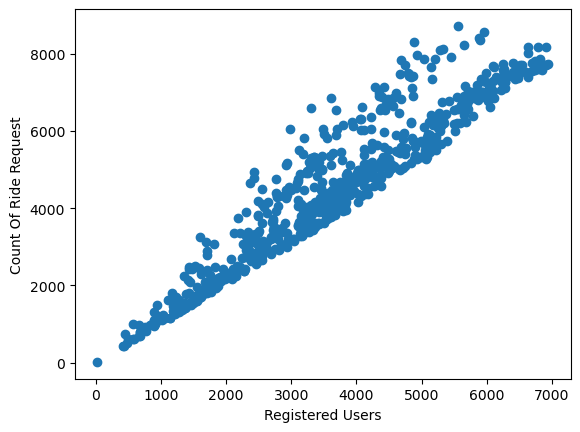

In [9]:
plt.scatter(df['registered'], df['count'])
plt.xlabel('Registered Users')
plt.ylabel('Count Of Ride Request')
plt.show()

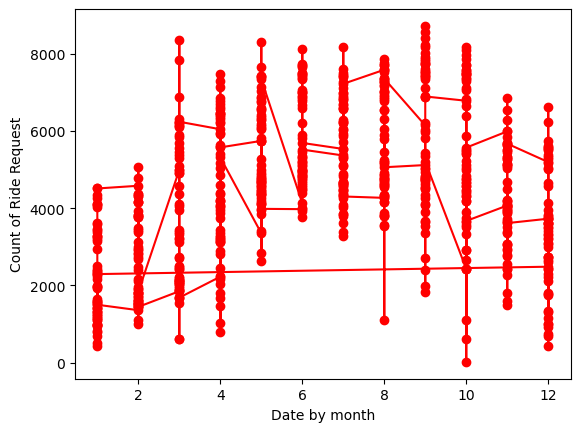

In [10]:
plt.plot(df['month'], df['count'], color='red', marker='o')
plt.xlabel('Date by month')
plt.ylabel('Count of Ride Request')
plt.show()

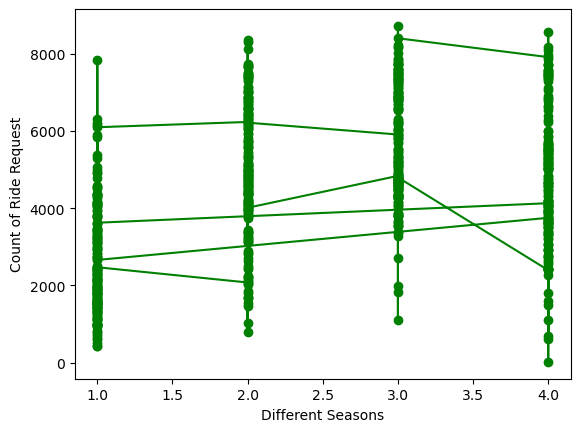

In [11]:
# season 1.0(spring), season 2.0(summer), season 3.0(fall), season 4.0(winter)
plt.plot(df['season'], df['count'], color='green', marker='o')
plt.xlabel('Different Seasons')
plt.ylabel('Count of Ride Request')
plt.show()

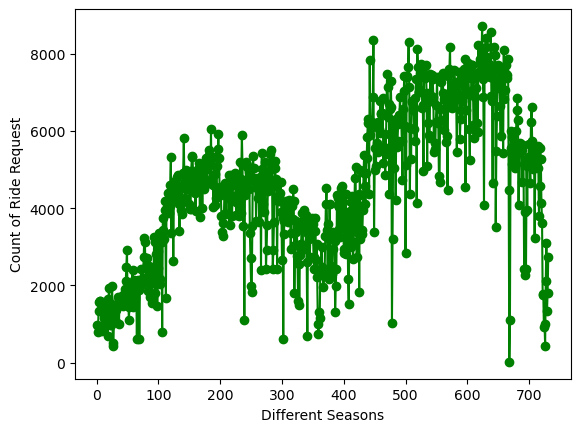

In [12]:
plt.plot(df['instant'], df['count'], color='green', marker='o')
plt.xlabel('Different Seasons')
plt.ylabel('Count of Ride Request')
plt.show()

### Prediction Using Machine Learning Models

In [13]:
# dropping the datetime column because it won't be needed
df.drop(['datetime'], axis=1, inplace=True)

In [14]:
# calling the dataset
df

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [15]:
# dividing my data into features(x) and target(y)
x = df.drop(['count'], axis=1)
y= df['count']

In [16]:
# spliting my data into training and testing where more (80%) of the data went into training the rest was used for actual prediction
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# used RandomForestRegressor model since it is a numerical prediction. r2_score used to check accuracy of our predicted value
model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

print('R Squared', metrics.r2_score(ytest,ypred))

R Squared 0.9974706609099414


In [18]:
# used support vector regressor model since it is a numerical prediction. r2_score used to check accuracy of our predicted value
svm = SVR(kernel='rbf')

svm.fit(xtrain, ytrain)

y_pred = svm.predict(xtest)

print('R Squared', metrics.r2_score(ytest,y_pred))

R Squared 0.060362501703628335


In [19]:
# used xgb regressor model since it is a numerical prediction. r2_score used to check accuracy of our predicted value
xgb = XGBRegressor(n_estimators=100, max_depth=7, subsample=0.7)

xgb.fit(xtrain, ytrain)

prediction = xgb.predict(xtest)

print('R Squared', metrics.r2_score(ytest,prediction))

R Squared 0.9960457275038885


In [21]:
import pickle
pickle.dump(model, open("C:\\Users\\Amarachi Uzochukwu\\Desktop\\RFR_model.pkl", 'wb'))